                                                Mini Project - Python
                                                Topic - Loan Dataset

Introduction - Loans dataset aims to identify variables which indicate if a
person is likely to default, which can be used for identifying the risky loan
applicants to avoid any financial loss to the company.
Dataset Description - It contains the complete loan data for all loans
issued through the time period 2007 to 2011.
Data Dictionary -
1.annual_inc - The self-reported annual income provided by the borrower
during registration.
2.dti - A ratio calculated using the borrower’s total monthly debt payments on
the total debt obligations, excluding mortgage and the requested LC loan,
divided by the borrower’s self-reported monthly income.
3.emp_length -Employment length in years. Possible values are between 0 and
10 where 0 means less than one year and 10 means ten or more years.
4.funded_amnt - The total amount committed to that loan at that point in
time.
5.funded_amnt_inv -The total amount committed by investors for that loan at
that point in time.
6.grade - LC assigned loan grade
7.id - A unique LC assigned ID for the loan listing.
8.installment - The monthly payment owed by the borrower if the loan
originates.
9.int_rate - Interest Rate on the loan
10.last_pymnt_amnt-Last total payment amount received
11.last_pymnt_d -Last month payment was received
12.loan_amnt -The listed amount of the loan applied for by the borrower. If at
some point in time, the credit department reduces the loan amount, then it
will be reflected in this value.
13.loan_status - Current status of the loan
14.member_id -A unique LC assigned Id for the borrower member.
15.purpose - A category provided by the borrower for the loan request.
16.term -The number of payments on the loan. Values are in months and can
be either 36 or 60.
17.total_acc -The total number of credit lines currently in the borrower's credit
file
18.total_pymnt -Payments received to date for total amount funded
19.total_pymnt_inv -Payments received to date for portion of total amount
funded by investors
20.total_rec_int -Interest received to date

In [221]:
import pandas as pd
import numpy as np

In [222]:
# 1) Import the dataset and understand it.
df = pd.read_csv('loan.csv')

In [223]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


In [224]:
# 2) List down the number of rows and columns.
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 39717
Number of columns: 23


In [225]:
# 3) ‘Int_rate’ column is character type. With the help of lambda function convert into float type.

df = pd.read_csv('loan.csv')

# Convert 'int_rate' column from character type to float type using lambda function
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.strip('%')))

# Check the data type of the 'int_rate' column
int_rate_dtype = df['int_rate'].dtypes
print("Data type of 'int_rate' column:", int_rate_dtype)

Data type of 'int_rate' column: float64


In [226]:
# 4) Check the datatype of each column.
df.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
Unnamed: 21            float64
Unnamed: 22            float64
dtype: object

In [227]:
#  5) Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.

df_cleaned = df.dropna(axis=1, how='all')

print(df_cleaned)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term  int_rate  installment grade emp_length  ...  \
0       36 months     10.65       162.87     B  10+ years  ...   
1       60 months     15.27

In [228]:
# 6) Write the code to find the value counts of the ‘loan_status’ category column 
# -- and filter only the ‘fully paid’ and ‘charged off’ categories.

# Find value counts of the 'loan_status' column
loan_status_counts = df['loan_status'].value_counts()

# Filter only the ‘fully paid’ and ‘charged off’ categories.
filtered_loan_status = loan_status_counts[loan_status_counts.index.isin(['Fully Paid', 'Charged Off'])]

print(filtered_loan_status)

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


In [ ]:
# 7) Filter the ‘Emp_Len’ column to extract the numerical value from the string.
# Hint - Emp_len : < 1year, 2 years , 3 years as 1 , 2, 3 so on.

In [ ]:
# data_set['emp_length'] =data_set['emp_length'].str.extract('(\d+)')

In [ ]:
# df.emp_length = df.emp_length.str.extract(r'(\d+)').applymap(lambda x : int(x) if pd.notna(x) else np.nan)

In [230]:
# Function to extract numerical value from 'Emp_Len' string
def extract_numerical_value(emp_length):
    if isinstance(emp_length, str):
        # Remove 'year' and any non-numeric characters
        numeric_value = ''.join(filter(str.isdigit, emp_length))
        return int(numeric_value)
    else:
        return emp_length

df['emp_length'] = df['emp_length'].apply(extract_numerical_value)
print(df)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term  int_rate  installment grade  emp_length  ...  \
0       36 months     10.65       162.87     B        10.0  ...   
1       60 months     15.

In [ ]:
# 8) Using the Lambda function, remove the month from the ‘term’ column such that ‘36 months’, ‘60 months’ 
# -- appear as 36 and 60 respectively.

In [231]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))
print(df)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0      1077501    1296599       5000         5000           4975.0    36   
1      1077430    1314167       2500         2500           2500.0    60   
2      1077175    1313524       2400         2400           2400.0    36   
3      1076863    1277178      10000        10000          10000.0    36   
4      1075358    1311748       3000         3000           3000.0    60   
...        ...        ...        ...          ...              ...   ...   
39712    92187      92174       2500         2500           1075.0    36   
39713    90665      90607       8500         8500            875.0    36   
39714    90395      90390       5000         5000           1325.0    36   
39715    90376      89243       5000         5000            650.0    36   
39716    87023      86999       7500         7500            800.0    36   

       int_rate  installment grade  emp_length  ...             purpose  \
0         10

In [232]:
# 9) Create a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria 
# -- If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’. 

df['risky_loan_applicant'] = df.apply(lambda row: '0' if row['loan_amnt'] <= row['funded_amnt'] else '1', axis=1)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22,risky_loan_applicant
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10.0,...,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1.0,...,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10.0,...,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10.0,...,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1.0,...,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,4.0,...,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,NaN,NaN,0
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,3.0,...,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,NaN,NaN,0
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,1.0,...,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00,NaN,NaN,0
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,1.0,...,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00,NaN,NaN,0


In [ ]:
# 10) Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status 
# -- Write the observation from each graph.

In [233]:
import matplotlib.pyplot as plt

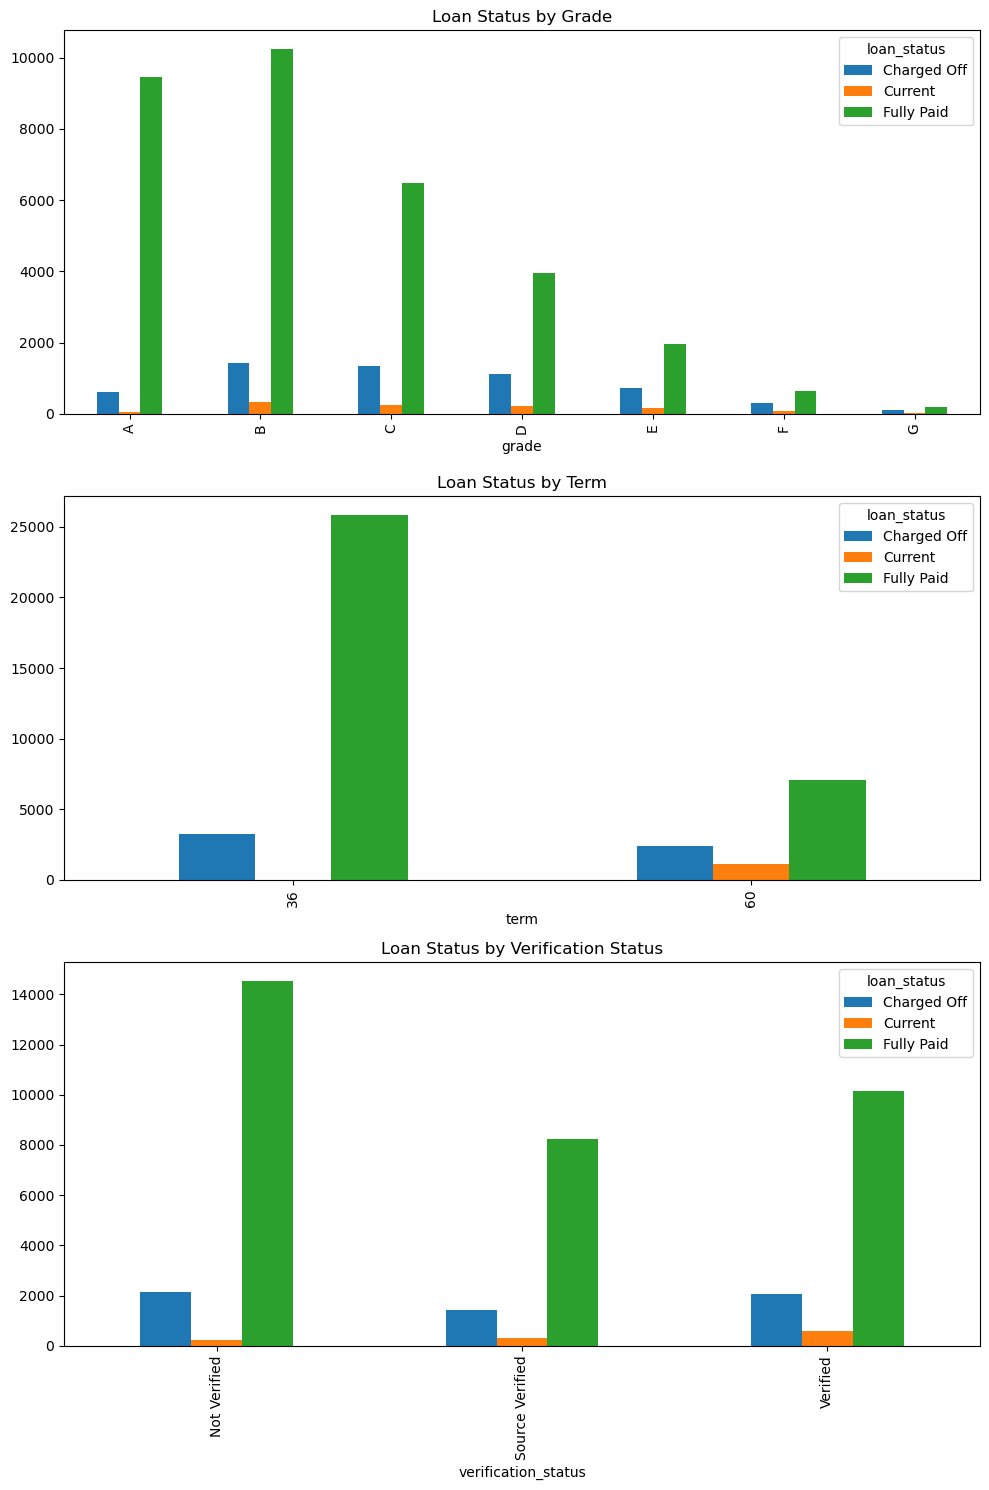

In [234]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot loan_status against grade
df.groupby(['grade', 'loan_status']).size().unstack().plot(kind='bar', ax=axes[0])
axes[0].set_title('Loan Status by Grade')

# Plot loan_status against term
df.groupby(['term', 'loan_status']).size().unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Loan Status by Term')

# Plot loan_status against verification_status
df.groupby(['verification_status', 'loan_status']).size().unstack().plot(kind='bar', ax=axes[2])
axes[2].set_title('Loan Status by Verification Status')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# 11) Using a user defined function convert the ‘emp_len’ column into
# categorical column as follows -
# If emp_len is less than equals to 1 then recode as ‘fresher’.
# If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
# If emp_len is greater than 3 and less than 7 then recode as ‘senior’
# If emp_len is greater than 7 then recode as ‘expert’.

In [246]:
def recode_emp_length(emp_len):
    try:
        emp_len = int(emp_len.split()[0])  # Extract numeric part and convert to integer
        if emp_len <= 1:
            return 'fresher'
        elif emp_len < 3:
            return 'junior'
        elif emp_len < 7:
            return 'senior'
        else:
            return 'expert'
    except:
        return emp_len  # Return the original value if there's an error

# Apply the custom function to the 'emp_length' column
df['emp_length'] = df['emp_length'].apply(recode_emp_length)

print(df)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0      1077501    1296599       5000         5000           4975.0    36   
1      1077430    1314167       2500         2500           2500.0    60   
2      1077175    1313524       2400         2400           2400.0    36   
3      1076863    1277178      10000        10000          10000.0    36   
4      1075358    1311748       3000         3000           3000.0    60   
...        ...        ...        ...          ...              ...   ...   
39712    92187      92174       2500         2500           1075.0    36   
39713    90665      90607       8500         8500            875.0    36   
39714    90395      90390       5000         5000           1325.0    36   
39715    90376      89243       5000         5000            650.0    36   
39716    87023      86999       7500         7500            800.0    36   

       int_rate  installment grade emp_length  ...    dti   total_pymnt  \
0         10

In [ ]:
# 12) Find the sum of ‘loan_amnt’ for each grade and display the distribution of ‘loan_amnt’ using a pie plot.

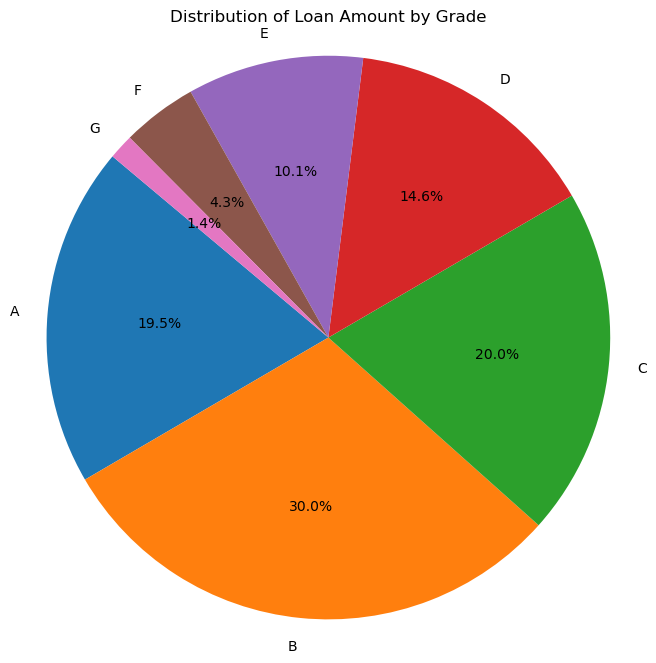

In [219]:
# Calculate the sum of 'loan_amnt' for each grade
loan_amnt_by_grade = df.groupby('grade')['loan_amnt'].sum()

# Create a pie plot to display the distribution
plt.figure(figsize=(8, 8))
plt.pie(loan_amnt_by_grade, labels=loan_amnt_by_grade.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Amount by Grade')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()